In [150]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd

In [151]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from config import key

In [152]:
# connect to postgres sql server and database via sql alchemy
engine = create_engine(key, echo=False)
connection = engine.connect()

In [153]:
# inspect engine
inspector = inspect(engine)
inspector.get_table_names()

['dept_manager', 'titles', 'employees', 'departments', 'salaries', 'dept_emp']

In [154]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('salaries')
for c in columns:
    print(c['name'], c["type"])

emp_no INTEGER
salary INTEGER


In [64]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('titles')
for c in columns:
    print(c['name'], c["type"])

title_id VARCHAR
title VARCHAR


In [65]:
# display first 10 salaries from salary table
engine.execute('SELECT * FROM salaries LIMIT 10').fetchall()

[(10001, 60117),
 (10002, 65828),
 (10003, 40006),
 (10004, 40054),
 (10005, 78228),
 (10006, 40000),
 (10007, 56724),
 (10008, 46671),
 (10009, 60929),
 (10010, 72488)]

In [75]:
# create salary dataframe 
salaries = pd.read_sql("SELECT * FROM salaries", connection)
salaries.head(10)

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
5,10006,40000
6,10007,56724
7,10008,46671
8,10009,60929
9,10010,72488


In [76]:
# create titles dataframe
titles = pd.read_sql("SELECT * FROM titles", connection)
titles.head(10)

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [88]:
# rename title_id column to emp_title so I can merge with employees table
titles = titles.rename(columns={"title_id": "emp_title"})
titles.head()

,emp_title,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [89]:
# create employees dataframe
employees = pd.read_sql("SELECT * FROM employees", connection)
employees.head(10)

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
5,263976,e0003,1959-10-30,Eran,Cusworth,M,1986-11-14
6,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28
7,461591,s0002,1964-11-17,Xudong,Samarati,M,1985-11-13
8,477657,e0002,1962-12-18,Lihong,Magliocco,M,1993-10-23
9,219881,s0002,1956-04-24,Kwangyoen,Speek,F,1993-02-14


In [90]:
# merge employees and salaries into one table
employees_salaries = pd.merge(employees, salaries, how="outer", on="emp_no")
employees_salaries.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [93]:
# merge employees + salaries with titles 
merged = pd.merge(employees_salaries, titles, how='outer', on='emp_title')
merged.head(10)

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff
5,476443,s0001,1952-08-27,Ziya,Asmuth,M,1995-08-24,63371,Staff
6,424270,s0001,1963-01-15,Kellyn,Yoshizawa,F,1995-05-08,60678,Staff
7,427958,s0001,1957-05-03,Feixiong,Poujol,F,1985-05-11,63377,Staff
8,280408,s0001,1964-09-19,Elliott,Perl,M,1987-10-29,75963,Staff
9,229010,s0001,1961-11-12,Mark,Cappelli,M,1990-05-07,40000,Staff


In [102]:
# df of salaries grouped by title
title_groups = merged.groupby('title')
avg_salary = pd.DataFrame(round(title_groups['salary'].mean(),2))
avg_salary

,salary
title,
Assistant Engineer,48564.43
Engineer,48535.34
Manager,51531.04
Senior Engineer,48506.80
Senior Staff,58550.17
Staff,58465.38
Technique Leader,48582.90


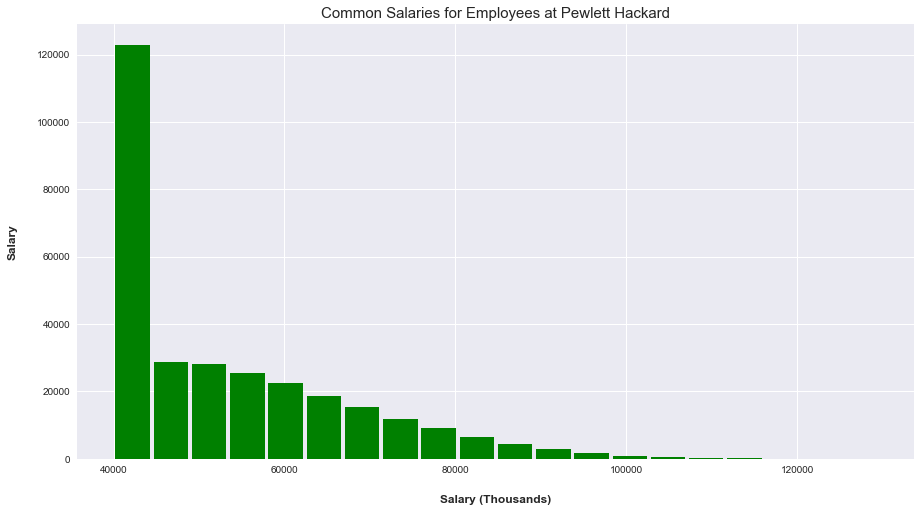

In [149]:
# histogram of common salarys for employees
common_salary = merged.hist(column='salary',bins=20, color='green', figsize=(15,8), zorder=2, rwidth=0.9)
                            
common_salary = common_salary[0]
for x in common_salary:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")


    # Remove title
    x.set_title("Common Salaries for Employees at Pewlett Hackard", size=15)

    # Set x-axis label
    x.set_xlabel("Salary (Thousands)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Salary", labelpad=20, weight='bold', size=12)

plt.savefig('images/common_salary_hist.png')
plt.show();
    

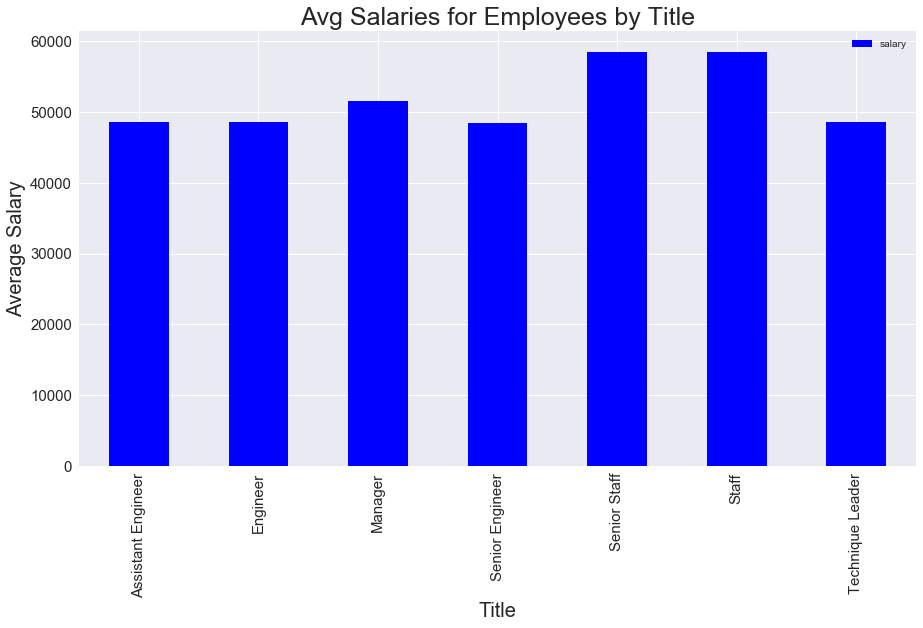

In [121]:
# bar graph of average employee salary by title 
avg_salary_bar = avg_salary.plot(kind="bar", color="blue", fontsize=15, figsize=(15,8))

plt.title("Avg Salaries for Employees by Title", size=25)
plt.xlabel('Title', size=20)
plt.ylabel('Average Salary',size=20)
plt.savefig('images/avg_salary_bar.png')
plt.show();